In [1]:
from qiskit import *

In [2]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [3]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [4]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()

In [5]:
provider.backends()

[<IBMBackend('ibm_wellington')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_nairobi')>]

In [6]:
from qiskit.tools.monitor import job_monitor

In [7]:
backend = BasicAer.get_backend('qasm_simulator')
new_circuit=transpile(circuit,backend)
new_circuit.draw()

┌─────────┐     ┌─┐   
q_0: ┤ U2(0,π) ├──■──┤M├───
     └─────────┘┌─┴─┐└╥┘┌─┐
q_1: ───────────┤ X ├─╫─┤M├
                └───┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1

In [8]:
job = backend.run(new_circuit)
result = job.result()
counts1 = result.get_counts()
print(counts1)

{'00': 498, '11': 526}


In [9]:
backend = provider.get_backend('ibmq_qasm_simulator')
new_circuit=transpile(circuit,backend)
new_circuit.draw()

┌──────────┐     ┌─┐   
q_0: ┤ U2(0,-π) ├──■──┤M├───
     └──────────┘┌─┴─┐└╥┘┌─┐
q_1: ────────────┤ X ├─╫─┤M├
                 └───┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1

In [10]:
job = backend.run(new_circuit)
result = job.result()
counts2 = result.get_counts()
print(counts2)

{'00': 2010, '11': 1990}


In [11]:
backend = provider.get_backend('ibm_hanoi')
new_circuit=transpile(circuit,backend)
new_circuit.draw()

global phase: π/4
                 ┌─────────┐┌────┐┌─────────┐     ┌─┐   
        q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤M├───
                 └─────────┘└────┘└─────────┘┌─┴─┐└╥┘┌─┐
        q_1 -> 1 ────────────────────────────┤ X ├─╫─┤M├
                                             └───┘ ║ └╥┘
  ancilla_0 -> 2 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
  ancilla_1 -> 3 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
  ancilla_2 -> 4 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
  ancilla_3 -> 5 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
  ancilla_4 -> 6 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
  ancilla_5 -> 7 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
  ancilla_6 -> 8 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
  ancilla_7 -> 9 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
 ancilla_8 -> 10 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
 ancilla_9 -> 11 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_10 -> 12 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_11 -> 13 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_12 -> 14 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_13 -> 15 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_14 -> 16 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_15 -> 17 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_16 -> 18 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_17 -> 19 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_18 -> 20 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_19 -> 21 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_20 -> 22 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_21 -> 23 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_22 -> 24 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_23 -> 25 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
ancilla_24 -> 26 ──────────────────────────────────╫──╫─
                                                   ║  ║ 
            c: 2/══════════════════════════════════╩══╩═
                                                   0  1

In [12]:
job = backend.run(new_circuit)
job_monitor(job)
result = job.result()
counts3 = result.get_counts()
print(counts3)

Job Status: job has successfully run
{'00': 2047, '01': 52, '10': 43, '11': 1858}


In [13]:
backend = provider.get_backend('ibm_perth')
new_circuit=transpile(circuit,backend)
new_circuit.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐     ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐└╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─╫─┤M├
                                           └───┘ ║ └╥┘
ancilla_0 -> 2 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_1 -> 3 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_2 -> 4 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_3 -> 5 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_4 -> 6 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
          c: 2/══════════════════════════════════╩══╩═
                                                 0  1

In [14]:
job = backend.run(new_circuit)
job_monitor(job)
result = job.result()
counts4 = result.get_counts()
print(counts4)

Job Status: job has successfully run
{'00': 1834, '01': 104, '10': 162, '11': 1900}


In [15]:
from qiskit.visualization import plot_histogram

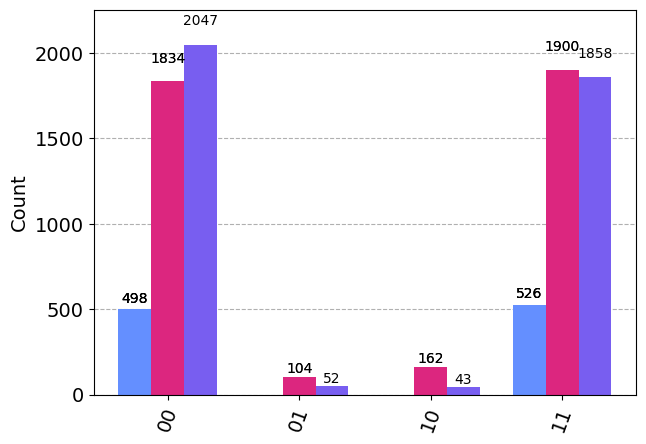

In [16]:
plot_histogram([counts1,counts4, counts3])